### **STEP 1. Installing the package using 'pip' and import it into the notebook**     

**FIMserv in PyPI**: https://pypi.org/project/fimserve/

In [3]:
%pip install fimserve==0.1.81

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: fimserve
    Found existing installation: fimserve 0.1.80
    Uninstalling fimserve-0.1.80:
      Successfully uninstalled fimserve-0.1.80
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing fimserve and other necessary libraries

import fimserve as fm
import pandas as pd    

### **STEP 2. Identifying the HUC8 ID from AOI**

#**The OWP HAND FIM model runs at the HUC-8 watershed scale. Users need to identify the HUC8 ID for their specific region of interest. In this example, we are using the Neuse River Flooding in North Carolina from Hurricane Matthew, 2016 . The locations and information about the HUC8 IDs are available here in [ArcGIS Instant App.](https://ualabama.maps.arcgis.com/apps/instant/basic/index.html?appid=88789b151b50430d8e840d573225b36b)**

In [3]:
AOI = '/Users/anupalbaruah/Documents/CIROH-DEVCON/Area/NeuseRiver,NC_.shp'

summary = fm.getIntersectedHUC8ID(AOI)
print(summary)

Your boundary falls within:
----------------------------------
HUC8 - 03020202
NAME - Middle Neuse



### **STEP 3. Assigning the HUC8 ID and flood event**

** If the user knows the date and time of the flood event, they can assign both. If the time is unknown, the user can assign only the date, and FIMserve will compute the daily average flow.

In [5]:
#Necessary variables
huc = "03020202"
start_date = "2016-10-04"
end_date = "2016-10-16"

#Value times where user wants to generate the FIM, any number as per user requirement
value_times = ["2016-10-09 15:00:00","2016-10-10 17:00:00","2016-10-14 17:00:00","2016-10-15 17:00:00"]

### **STEP 4. Download the HUC8**

In [6]:
# Download the data for one huc
fm.DownloadHUC8(huc)

Cloning into '/Users/anupalbaruah/Documents/CIROH-DEVCON/code/inundation-mapping'...


Repository cloned into: /Users/anupalbaruah/Documents/CIROH-DEVCON/code/inundation-mapping
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branch_ids.lst to output/flood_03020202/03020202/branch_ids.lst
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branch_ids.csv to output/flood_03020202/03020202/branch_ids.csv
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branch_polygons.gpkg to output/flood_03020202/03020202/branch_polygons.gpkg
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/0/osm_bridge_centroids_0.gpkg to output/flood_03020202/03020202/branches/0/osm_bridge_centroids_0.gpkg
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/0/gw_catchments_reaches_filtered_addedAttributes_0.tif to output/flood_03020202/03020202/branches/0/gw_catchments_reaches_filtered_addedAttributes_0.tif
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/0/small_segments_0.csv to output/flood_03020202/03020202

download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000039/demDerived_reaches_split_filtered_addedAttributes_crosswalked_1097000039.gpkg to output/flood_03020202/03020202/branches/1097000039/demDerived_reaches_split_filtered_addedAttributes_crosswalked_1097000039.gpkg
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000037/src_full_crosswalked_1097000037.csv to output/flood_03020202/03020202/branches/1097000037/src_full_crosswalked_1097000037.csv
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000038/src_full_crosswalked_1097000038.csv to output/flood_03020202/03020202/branches/1097000038/src_full_crosswalked_1097000038.csv
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000039/gw_catchments_reaches_filtered_addedAttributes_crosswalked_1097000039.gpkg to output/flood_03020202/03020202/branches/1097000039/gw_catchments_reaches_filtered_addedAttributes_crosswalked_1097000039.gpkg
download: 

download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000043/demDerived_reaches_split_filtered_addedAttributes_crosswalked_1097000043.gpkg to output/flood_03020202/03020202/branches/1097000043/demDerived_reaches_split_filtered_addedAttributes_crosswalked_1097000043.gpkg
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000043/gw_catchments_reaches_filtered_addedAttributes_1097000043.tif to output/flood_03020202/03020202/branches/1097000043/gw_catchments_reaches_filtered_addedAttributes_1097000043.tif
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000043/osm_bridge_centroids_1097000043.gpkg to output/flood_03020202/03020202/branches/1097000043/osm_bridge_centroids_1097000043.gpkg
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000041/src_full_crosswalked_1097000041.csv to output/flood_03020202/03020202/branches/1097000041/src_full_crosswalked_1097000041.csv
download: s3://ciroh-owp-hand-fim/

download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000049/gw_catchments_reaches_filtered_addedAttributes_1097000049.tif to output/flood_03020202/03020202/branches/1097000049/gw_catchments_reaches_filtered_addedAttributes_1097000049.tif
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000049/backpool_stats.csv to output/flood_03020202/03020202/branches/1097000049/backpool_stats.csv
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000041/rem_zeroed_masked_1097000041.tif to output/flood_03020202/03020202/branches/1097000041/rem_zeroed_masked_1097000041.tif
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000047/src_base_1097000047.csv to output/flood_03020202/03020202/branches/1097000047/src_base_1097000047.csv
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000049/gw_catchments_reaches_filtered_addedAttributes_crosswalked_1097000049.gpkg to output/flood_03020202/030

download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000052/src_full_crosswalked_1097000052.csv to output/flood_03020202/03020202/branches/1097000052/src_full_crosswalked_1097000052.csv
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000052/src_base_1097000052.csv to output/flood_03020202/03020202/branches/1097000052/src_base_1097000052.csv
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000052/osm_bridge_centroids_1097000052.gpkg to output/flood_03020202/03020202/branches/1097000052/osm_bridge_centroids_1097000052.gpkg
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000053/backpool_stats.csv to output/flood_03020202/03020202/branches/1097000053/backpool_stats.csv
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000051/gw_catchments_pixels_1097000051.gpkg to output/flood_03020202/03020202/branches/1097000051/gw_catchments_pixels_1097000051.gpkg
download: s3://ciro

download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000056/src_base_1097000056.csv to output/flood_03020202/03020202/branches/1097000056/src_base_1097000056.csv
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000056/src_full_crosswalked_1097000056.csv to output/flood_03020202/03020202/branches/1097000056/src_full_crosswalked_1097000056.csv
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000057/demDerived_reaches_split_filtered_addedAttributes_crosswalked_1097000057.gpkg to output/flood_03020202/03020202/branches/1097000057/demDerived_reaches_split_filtered_addedAttributes_crosswalked_1097000057.gpkg
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000057/gw_catchments_reaches_filtered_addedAttributes_1097000057.tif to output/flood_03020202/03020202/branches/1097000057/gw_catchments_reaches_filtered_addedAttributes_1097000057.tif
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202

download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/branches/1097000055/rem_zeroed_masked_1097000055.tif to output/flood_03020202/03020202/branches/1097000055/rem_zeroed_masked_1097000055.tif
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/nwm_subset_streams_levelPaths.gpkg to output/flood_03020202/03020202/nwm_subset_streams_levelPaths.gpkg
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/nwm_headwater_points_subset.gpkg to output/flood_03020202/03020202/nwm_headwater_points_subset.gpkg
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/nwm_subset_streams_levelPaths_dissolved.gpkg to output/flood_03020202/03020202/nwm_subset_streams_levelPaths_dissolved.gpkg
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/osm_bridges_subset.gpkg to output/flood_03020202/03020202/osm_bridges_subset.gpkg
download: s3://ciroh-owp-hand-fim/hand_fim_4_5_2_11/03020202/nwm_subset_streams_levelPaths_dissolved_headwaters.gpkg to output/flood_03020202/030

#### **STEP 4.1. Download the user defined  multiple HUC8**

**If User wants to run multiple HUC-8s, for instance if the region of interest falls within two HUC-8, a HUC.csv file can pass with the assigned HUC8 IDs.**

In [ ]:
huc = pd.read_csv('.HUC.csv')
for i in huc['HUC']:
     fm.DownloadHUC8(i)

#### **STEP 4.2. Subsetting based on streamorder**

**In a HUC-8, streamorder ranging from first order to tenth order. If the user needs to keep higher order streams this module can be used.**

In [ ]:
#If user needs streams having order more than 4

stream_order = '>4'     #It supports >, <, >=, <=, =,

#OR,

#If user wants to keep specific stream order

#stream_order= [4,5]

fm.DownloadHUC8(huc, stream_order)

Repository already exists at /content/code/inundation-mapping and contains files. Skipping clone.
Data for HUC 03020202
Copied the /content/output/flood_03020202/03020202/branch_ids.csv to /content/output/flood_03020202/fim_inputs.csv as fim_inputs.csv.
Unique feature IDs saved to /content/output/flood_03020202/feature_IDs.csv.


### **STEP 5. Downloading the NWM retrospective Streamflow data**

**This module is used to download the streamflow data based on user defined HUC8 ID and event time.Streamflow data are saved to the input directory.**

In [7]:
fm.getNWMretrospectivedata(huc, start_date, end_date, value_times)

NWM discharge data saved to /Users/anupalbaruah/Documents/CIROH-DEVCON/output/flood_03020202/discharge/nwm30_retrospective.
Discharge values saved to /Users/anupalbaruah/Documents/CIROH-DEVCON/data/inputs/NWM_20161009150000_03020202.csv
Discharge values saved to /Users/anupalbaruah/Documents/CIROH-DEVCON/data/inputs/NWM_20161010170000_03020202.csv
Discharge values saved to /Users/anupalbaruah/Documents/CIROH-DEVCON/data/inputs/NWM_20161014170000_03020202.csv
Discharge values saved to /Users/anupalbaruah/Documents/CIROH-DEVCON/data/inputs/NWM_20161015170000_03020202.csv


### **STEP 5.1. Plot the NWM retrospective Streamflow data for the user defined feature-ids within the HUC-8**

**This module is used to plot the NWM streamflow data based on user defined river ID. Information about feature_ids are available here [ArcGIS Instant App.](https://ualabama.maps.arcgis.com/apps/instant/basic/index.html?appid=88789b151b50430d8e840d573225b36b)**
OR
**feature_ids can be found in the ```Path(./output/flood_hucID/hucID/feature_ids)```**

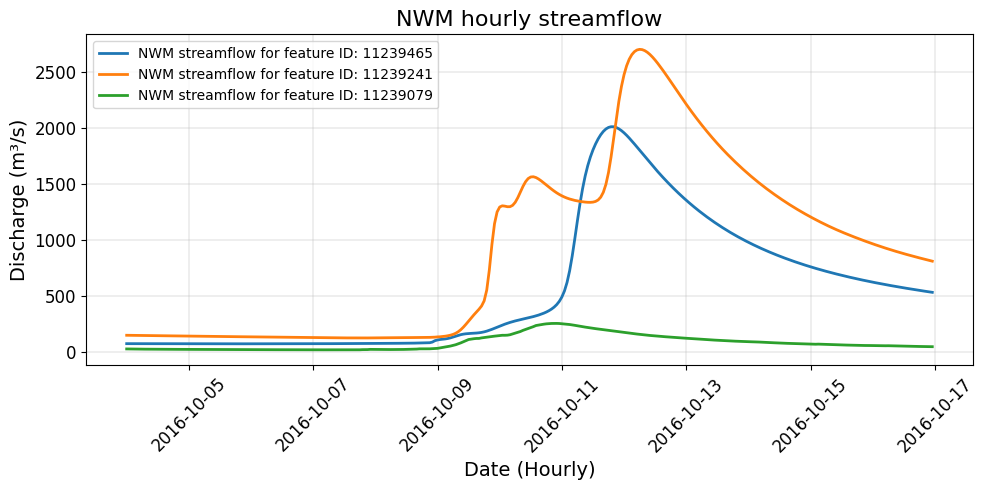

****Data not found for the following NWM feature IDs: 11239413****


In [8]:
feature_id = ["11239413", '11239465', '11239241', "11239079"]       #Those FIDs are picked from '03020202' HUCID
fm.plotNWMStreamflow(huc, start_date, end_date, feature_id)

#### **STEP 5.2. Plot the NWM retrospective Streamflow data for the maximum discharge carrying stream**

**This module is used to plot the flowline with the maximum discharge in the entire river network within the watershed if user didnot provide any feature_ids as argument**

*****No feature_id provided. Using the feature with max discharge: 11239503******


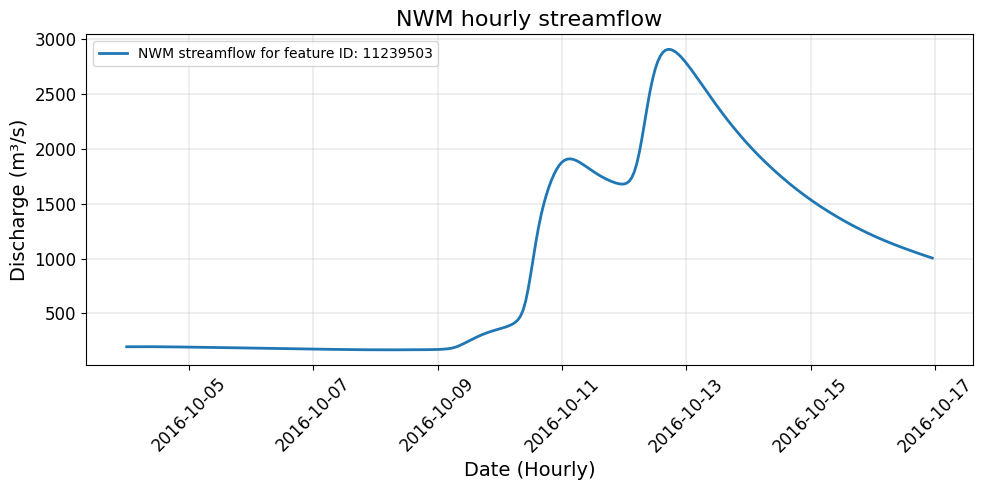

In [9]:
fm.plotNWMStreamflow(huc, start_date, end_date)

#### **STEP 5.3. Identify the NWM streams intersecting the USGS streamflow gauge**
**This module is used to identify the flowline intersecting the USGS gauge stations within the working HUC ID. It makes the evaluation between NWM and USGS more easier**

In [10]:
fm.GetUSGSIDandCorrFID(huc)

***USGS gauge station ID and corresponding feature ID for HUC 03020202***
╒═════════════════════════╤══════════════╕
│   USGS gauge station ID │   feature_id │
╞═════════════════════════╪══════════════╡
│                02089000 │     11239411 │
├─────────────────────────┼──────────────┤
│                02089500 │     11239465 │
├─────────────────────────┼──────────────┤
│                02091814 │     11239241 │
├─────────────────────────┼──────────────┤
│              0209205053 │     11239079 │
╘═════════════════════════╧══════════════╛


USGS gauge station ID  feature_id
0              02089000    11239411
1              02089500    11239465
2              02091814    11239241
3            0209205053    11239079

#### **STEP 5.3. Get the USGS streamflow**
**This module is used to get the USGS streamflow for the user defined time frame, or event  and plot**

In [11]:
# To plot the USGS, First download the USGS site data for date range in sites
usgs_sites = ["02089000", "02089500", "020918145", "0209205053"]        #Those USGS sites are picked from '03020202' HUCID

#If you know the usgs gauge sites
fm.getUSGSsitedata(huc, start_date, end_date, usgs_sites=usgs_sites)

#If you don't know the usgs gauge sites, Need time series data as well as event then
fm.getUSGSsitedata(huc, start_date, end_date, value_times = value_times)

#If you just want to get the event based USGS station data
fm.getUSGSsitedata(huc, value_times = value_times)

#For muliple watersheds
#fm.getUSGSsitedata(huc_event_dict=huc_event_dict)

***USGS gauge station ID and corresponding feature ID for HUC 03020202***
╒═════════════════════════╤══════════════╕
│   USGS gauge station ID │   feature_id │
╞═════════════════════════╪══════════════╡
│                02089000 │     11239411 │
├─────────────────────────┼──────────────┤
│                02089500 │     11239465 │
├─────────────────────────┼──────────────┤
│                02091814 │     11239241 │
├─────────────────────────┼──────────────┤
│              0209205053 │     11239079 │
╘═════════════════════════╧══════════════╛
***USGS gauge station ID and corresponding feature ID for HUC 03020202***
╒═════════════════════════╤══════════════╕
│   USGS gauge station ID │   feature_id │
╞═════════════════════════╪══════════════╡
│                02089000 │     11239411 │
├─────────────────────────┼──────────────┤
│                02089500 │     11239465 │
├─────────────────────────┼──────────────┤
│                02091814 │     11239241 │
├─────────────────────────┼────────

In [12]:
#Plot the USGS streamflow data
fm.plotUSGSStreamflow(huc, usgs_sites, start_date, end_date)

****Data not found for the following USGS gauge sites: 020918145, 0209205053****


#### **STEP 5.4. Plot  NWM streamflow with USGS streamflow**
**This module is used to compare the USGS streamflow with the NWM streamflow**

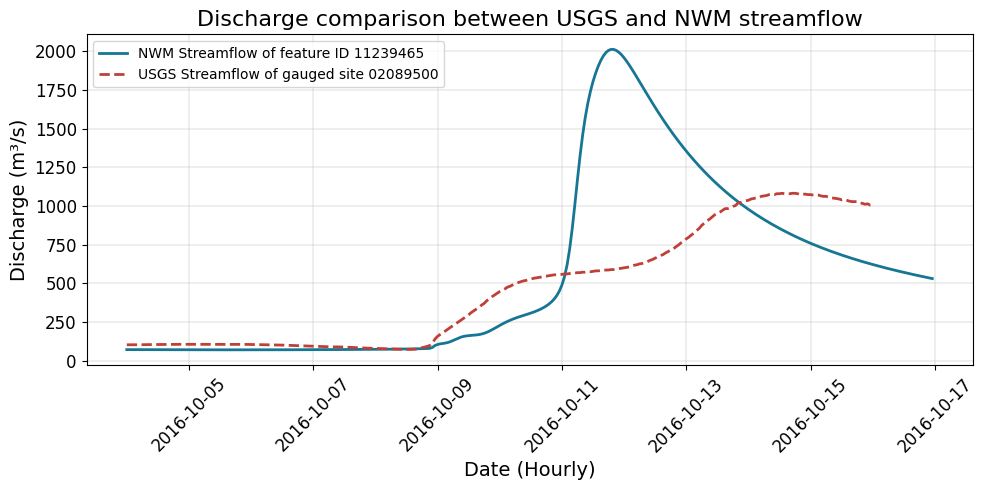

In [13]:
fm.CompareNWMnUSGSStreamflow(huc, feature_id[1], usgs_sites[1], start_date, end_date)

#### **STEP 5.5 Evaluating the NWM streamflow with USGS streamflow**

**This module is used to evaluate the NWM streamflow with USGS streamflow**

In [14]:
#Once we have the  USGS and corresponding feature_ids, we have predicted as well as ground truth data on this particular site. So Calculating
#Statistics
fm.CalculateStatistics(huc, feature_id[1], usgs_sites[1], start_date, end_date)

***********Metrics for the given USGS gauge 02089500 and NWM feature ID 11239465***********
KGE: 0.2889
PBias (%): 57.1968
NSE: -0.4821


#### **STEP 6. Downloading the NWM forecast Streamflow data**

**The National Water Model (NWM) provides streamflow forecasts across the United States at different time scales: long-range, medium-range, and short-range. These forecasts are in the UTC time zone and are saved to the input directory.**

**1) Long Range Forecast: Generated four times per day (every 6 hours: (00, 06, 12, 18)UTC), producing a 16-member ensemble forecast for 30 days. It provides 6-hourly streamflow and daily land surface outputs. Since there are four forecasts per day, a total of 120 forecasts are generated per month as a netCDF files. For FIM generation, It automatically abstracts the daily discharge**

**2) Medium Range Forecast: Provides deterministic streamflow forecasts every 3 hours for up to 10 days, resulting in a total of 80 forecasts for the period. Those forecast is also generate four times a day, and in these 4 timess, it forecast for next 10 days in an interval of 3 hours. So for medium range forecasting, it will give the 10 day, daily forecast**

**In Long range and medium range forecast, those daily forecast will be compiled from all 4 forecast for long range and 8 forecast for medium range based on user defined sort_by argument. It can be Maximum, Minimum or Mean of those data. By default if user doesnot provide any value, it will take the default maximum discharge for each rive reach from those daily readings.**

**3) Short-Range Forecast: Runs hourly, producing deterministic streamflow forecasts up to 18 hours into the future. This module is designed to download and manage these forecast datasets efficiently.**

In [15]:
#The ranges are shortrange, mediumrange, longrange, and hour is in UTC time, if user didnot povide any hour and date, it will take the current date and time
fm.getNWMForecasteddata(
    huc, forecast_range="shortrange", forecast_date="2025-04-01", hour=6
)

The final discharge values saved to /Users/anupalbaruah/Documents/CIROH-DEVCON/data/inputs


#### **STEP 6.1 Extracting the maximum ,minimum and median forecast streamflow**
**This module is useful to extract the maximum, minimum and median streamflow forecast for the watershed. This sorting is applicable for long range and medium range as it is compiled into daily discharge, but for the short range, it provides the next 18 hour forcast.**

In [17]:
# By default the data will be filtered based on maximum discharge value; User have option for getting maximum, minimum and median forecasted value
# Otherwise user need to mention

fm.getNWMForecasteddata(huc, forecast_range="mediumrange", forecast_date = "2025-04-01", sort_by="maximum",hour=6)    #This is an example of getting longrange data  with minimum sorting
fm.getNWMForecasteddata(huc, forecast_range="longrange", forecast_date = "2025-04-01", sort_by="maximum",hour=6)    #This is an example of getting longrange data  with minimum sorting

The final discharge values saved to /Users/anupalbaruah/Documents/CIROH-DEVCON/data/inputs
The final discharge values saved to /Users/anupalbaruah/Documents/CIROH-DEVCON/data/inputs


#### **STEP 7. Plot the Synthetic Rating Curves**
**Using this module , user can plot the synthetic rating curves for a specific branch or hydro ID. The branch IDs are identifiers for subsets of the HUC-8 watershed, while HydroIDs are identifiers for the micro-watersheds corresponding to each feature ID. This information is available in the hydrotable.csv file, which is located within the downloaded HUC-8 dataset.**

In [18]:
# to plot the SRC data user need the hydroID and corresponding branc ID
hydro_id = ["11640012", "11640001"]
branch_id = ["1097000033", "1097000033"]
dischargevalue = 60000

# User can pass the discharge value to get the stage value for that discharge
fm.plotSRC(huc, hydro_id, branch_id)

#### **STEP 7.1. Identify the stage for the input discharges from SRC**
**Using this module, user can check the stage that will be used in flood inundation mapping.**

In [19]:
#With some discharge value to see the stage value
fm.plotSRC(huc, hydro_id, branch_id, dischargevalue)

### **STEP 8. Run OWP HAND FIM model and generate inundation maps**
**This module is used to run the OWP HAND FIM model.Generated inundation rasters are saved in the output directory in .tiff format**

#### This module use the discahrge data stored in  ```Path(./data/inputs/)``` directory. The filename should contain the hucID and it has two coulmns, feature-id and discharge (m3/s). 

#### If user wants to customize the flow data (ouput fromML model,climate model,any other hydrological model) they ned to update these files.**

In [20]:
# run the FIM model, It will run the Hand model for the specified huc, if user is going through the multiple hucs, downloading discharge and everything for multiple huc , they can run it nicely for any number of HUC
fm.runOWPHANDFIM(huc)

#!NOT RECOMMENDED, But if user wants depths using this model, mark depth = True
# fm.runOWPHANDFIM(huc, depth=True)

Completed in 0.37 minutes.

Inundation mapping for 03020202 completed successfully.
Completed in 0.35 minutes.

Inundation mapping for 03020202 completed successfully.
Completed in 0.32 minutes.

Inundation mapping for 03020202 completed successfully.
Completed in 0.35 minutes.

Inundation mapping for 03020202 completed successfully.
Completed in 0.35 minutes.

Inundation mapping for 03020202 completed successfully.
Completed in 0.36 minutes.

Inundation mapping for 03020202 completed successfully.
Completed in 0.35 minutes.

Inundation mapping for 03020202 completed successfully.
Completed in 0.35 minutes.

Inundation mapping for 03020202 completed successfully.
Completed in 0.35 minutes.

Inundation mapping for 03020202 completed successfully.
Completed in 0.35 minutes.

Inundation mapping for 03020202 completed successfully.
Completed in 0.35 minutes.

Inundation mapping for 03020202 completed successfully.
Completed in 0.35 minutes.

Inundation mapping for 03020202 completed succes

#### **STEP 8.1. Subsetting the inundation rasters based on user defined coordinates and boundary shapefile**
**Based on user defined boundary shapefile and lattitude and longitude cordinates, this module is used to mask out a specific flood extent from the entire HUC8 flood inundation map**

In [ ]:
#There are two ways to run subsetting, one is user defined SHP, another is putting x, y  coordinate where user wants the FIM which should fall within the working HUC
# If user want to subset FIM from X, Y coord
location = [-77.505826, 35.323955]
fm.subsetFIM(location, huc, method="xy")

In [21]:
# If user want to subset FIM from boundary (shapefile)
location = '/Users/anupalbaruah/Documents/CIROH-DEVCON/SubsetBoundary/subsetBoundary.shp'
fm.subsetFIM(location, huc, method="boundary")

/Users/anupalbaruah/Documents/CIROH-DEVCON/output/flood_03020202/03020202_inundation/*_inundation.tif
Clipped raster saved to /Users/anupalbaruah/Documents/CIROH-DEVCON/output/flood_03020202/03020202_inundation/subsetFIM/shortrange_subsetFIM.tif
Clipped raster saved to /Users/anupalbaruah/Documents/CIROH-DEVCON/output/flood_03020202/03020202_inundation/subsetFIM/shortrange_subsetFIM.tif
Clipped raster saved to /Users/anupalbaruah/Documents/CIROH-DEVCON/output/flood_03020202/03020202_inundation/subsetFIM/shortrange_subsetFIM.tif
Clipped raster saved to /Users/anupalbaruah/Documents/CIROH-DEVCON/output/flood_03020202/03020202_inundation/subsetFIM/shortrange_subsetFIM.tif
Clipped raster saved to /Users/anupalbaruah/Documents/CIROH-DEVCON/output/flood_03020202/03020202_inundation/subsetFIM/NWM_subsetFIM.tif
Clipped raster saved to /Users/anupalbaruah/Documents/CIROH-DEVCON/output/flood_03020202/03020202_inundation/subsetFIM/NWM_subsetFIM.tif
Clipped raster saved to /Users/anupalbaruah/Docu

#### **STEP 9. Visualizing the inundation maps on different basemaps**
**This module is used to visualize the OWP HAND FIm generate inundation rasters over a varity of basemaps such as Google Satelite , Open Street Map etc.**

In [25]:
"""
Enter the HUC id for the vizualization that you are working and have generated FIMS already.
- Here sometimes need to mention GEE project ID to vizualize the inundation extent,
For my GEE, its 'supathdh', you may have different one. Read more about the project ID: https://developers.google.com/earth-engine/guides/auth
"""
huc = "03020202"
MapZoom = 10

#Path of inundation raster
inundation_raster = '/Users/anupalbaruah/Documents/CIROH-DEVCON/output/flood_03020202/03020202_inundation/NWM_20161009150000_03020202_inundation.tif'
fm.vizualizeFIM(inundation_raster, huc, MapZoom, projectID ='ee-anupalbaruahnesac')

Map(center=[1523133.8438746326, 1661275.6051740893], controls=(WidgetControl(options=['position', 'transparent…